In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns

In [ ]:
df = pd.read_csv("Retail sales dataset.csv")

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.isna().any()

,0
Transaction ID,False
Date,False
Customer ID,False
Gender,False
Age,False
Product Category,False
Quantity,False
Price per Unit,False
Total Amount,False


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
for i in df.columns.to_list():
    print(f'No of unique values in {i} => {df[i].nunique()}.')

No of unique values in Transaction ID => 1000.
No of unique values in Date => 345.
No of unique values in Customer ID => 1000.
No of unique values in Gender => 2.
No of unique values in Age => 47.
No of unique values in Product Category => 3.
No of unique values in Quantity => 4.
No of unique values in Price per Unit => 5.
No of unique values in Total Amount => 18.


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ','_')

In [ ]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

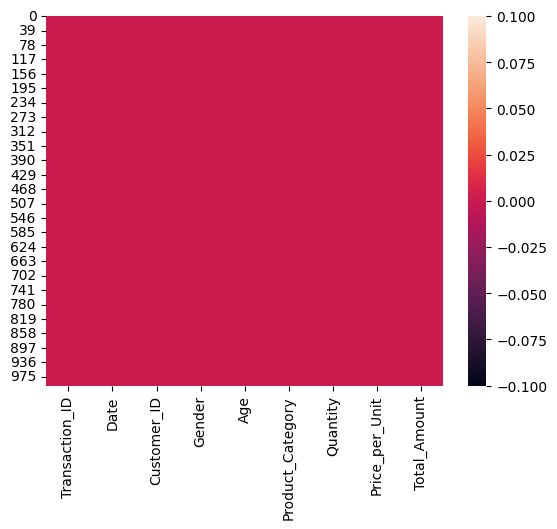

In [ ]:
sns.heatmap(df.isna());

In [ ]:
num_col = []
for col in df.columns:
    if df[col].dtypes != 'object':
        num_col.append(col)

In [ ]:
num_col

['Transaction_ID', 'Age', 'Quantity', 'Price_per_Unit', 'Total_Amount']

In [ ]:
cat_col = []
for col in df.columns:
    if df[col].dtypes == 'object':
        cat_col.append(col)

In [ ]:
cat_col

['Date', 'Customer_ID', 'Gender', 'Product_Category']

In [ ]:
df1 = df.copy()

In [ ]:
df1['Day'] = df1['Date'].str.split('-').str[2]
df1['Year'] = df1['Date'].str.split('-').str[0]

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1['Month']  = df1['Date'].dt.month_name()

In [ ]:
df1.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,2023,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2023,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,2023,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,2023,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,06,2023,May


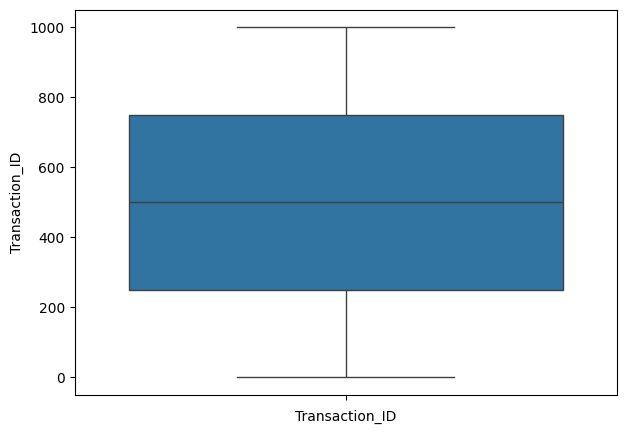

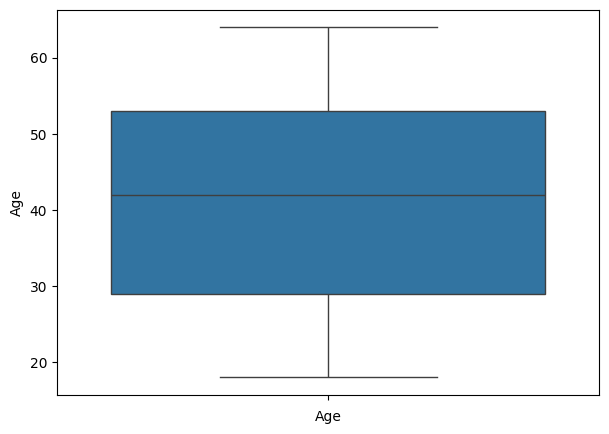

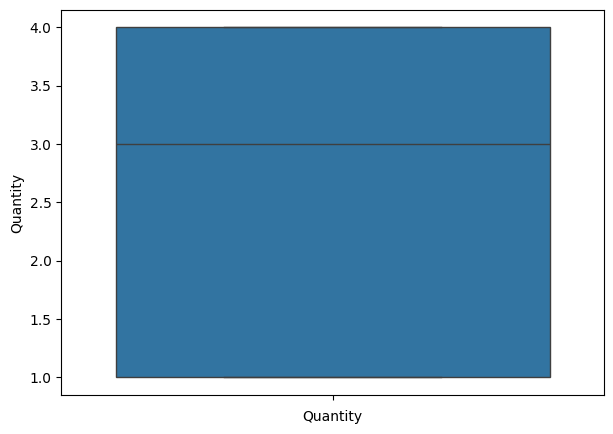

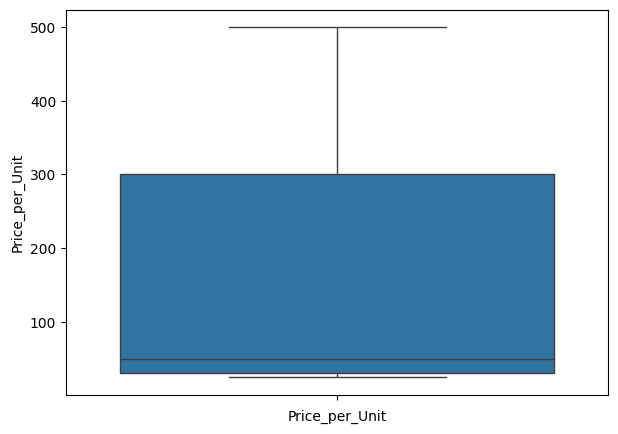

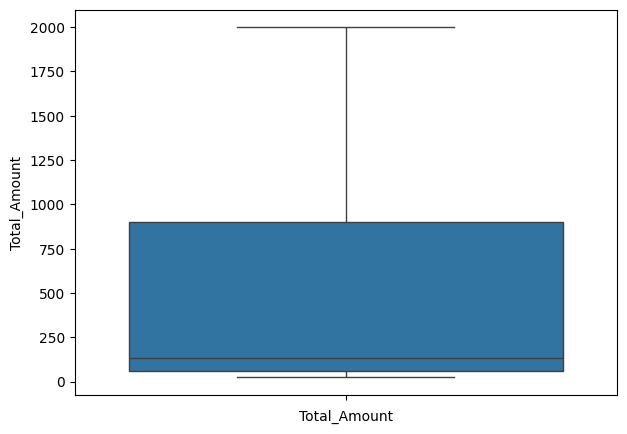

In [ ]:
for col in df.select_dtypes('int').columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
df1[df1.Price_per_Unit > df1.Total_Amount]

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month


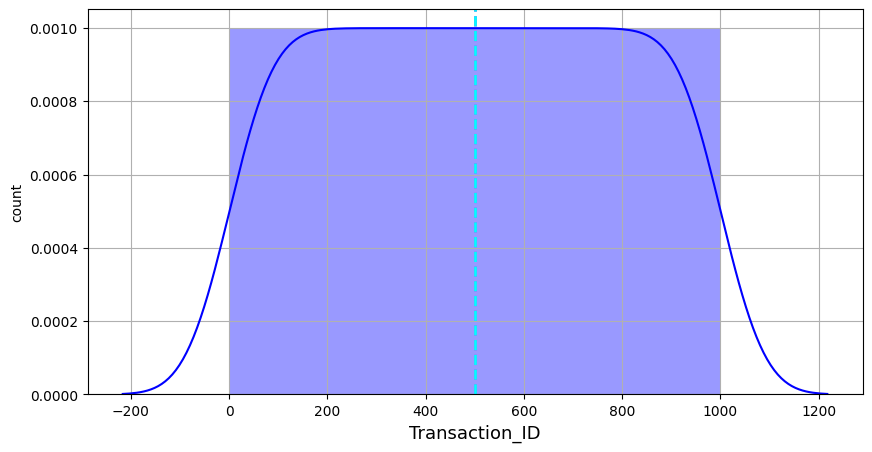

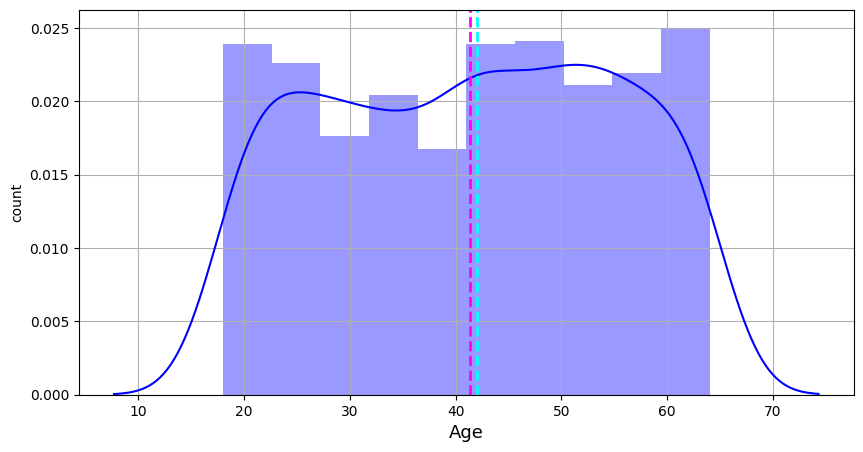

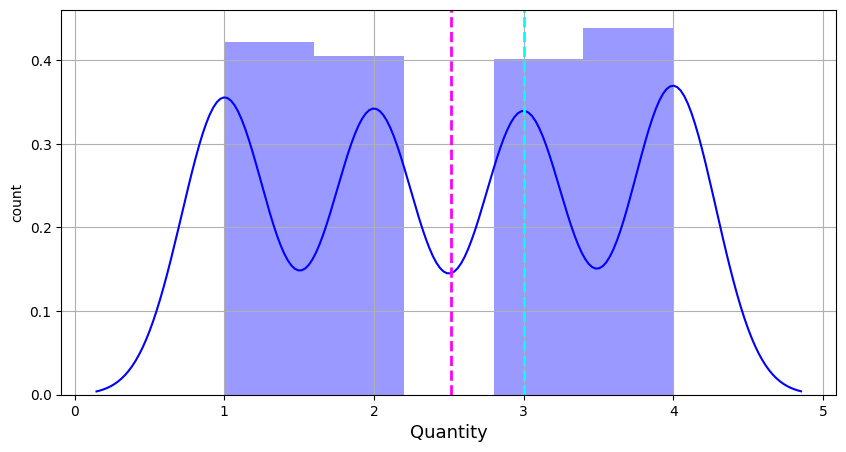

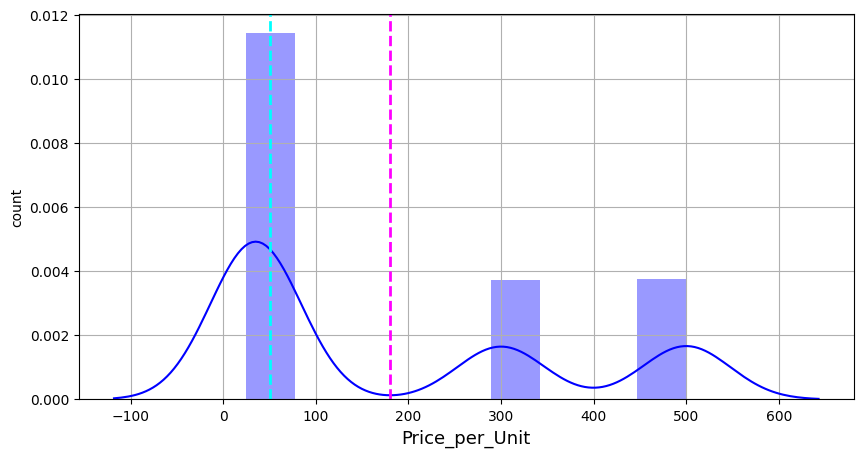

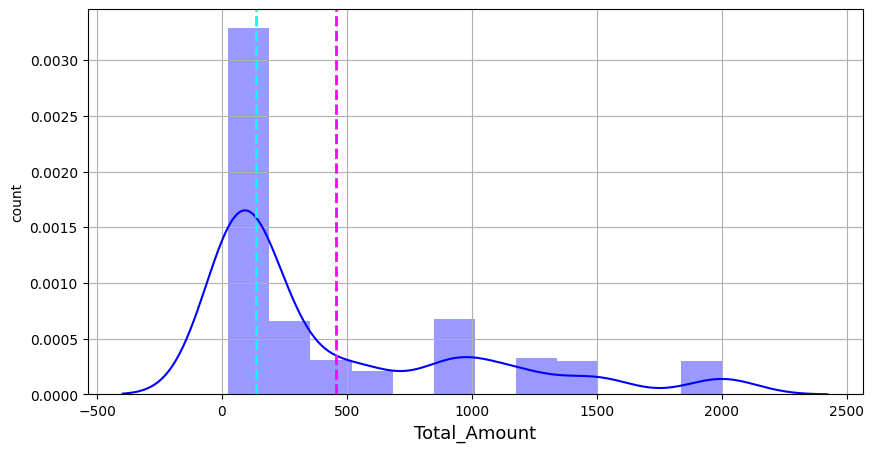

In [ ]:

for col in df.select_dtypes('int').columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[col], color='blue')

    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth = 2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth = 2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()

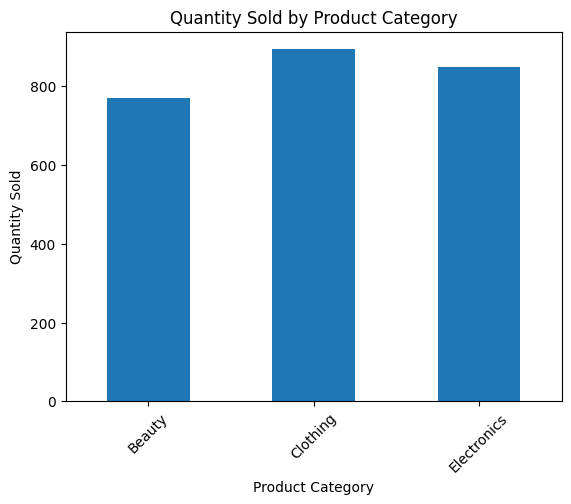

In [ ]:
df.groupby('Product_Category')['Quantity'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

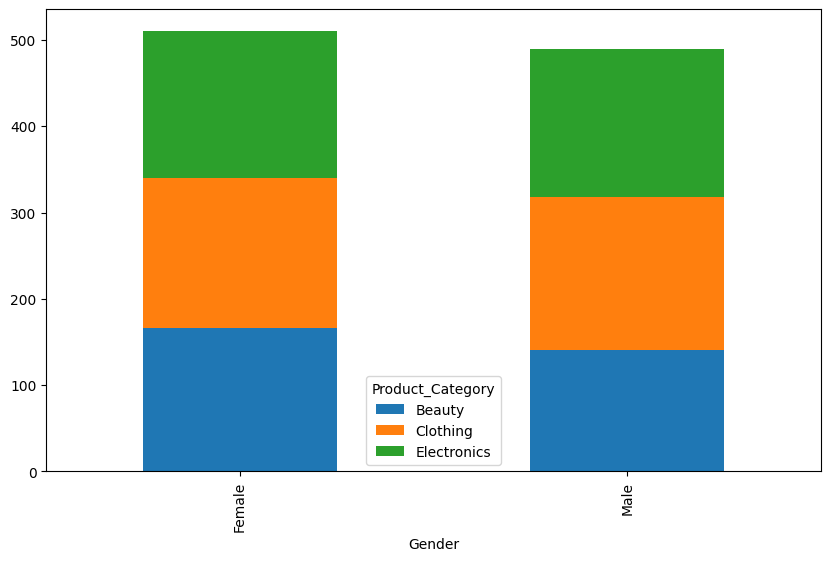

In [ ]:
df.groupby(['Gender','Product_Category'])['Customer_ID'].count().unstack().plot(kind='bar',stacked=True,figsize=(10,6));

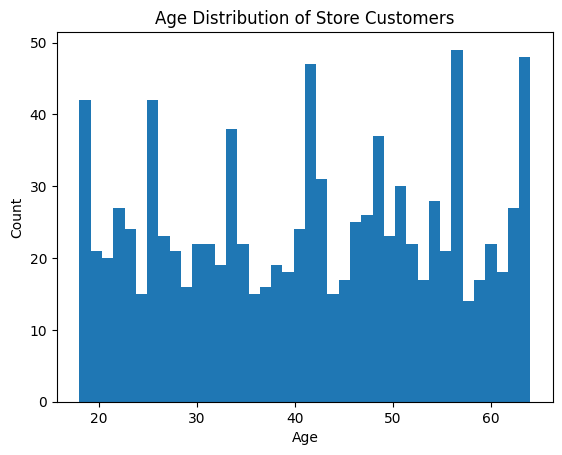

In [ ]:
df['Age'].plot(kind='hist', bins=40, title='Age Distribution of Store Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

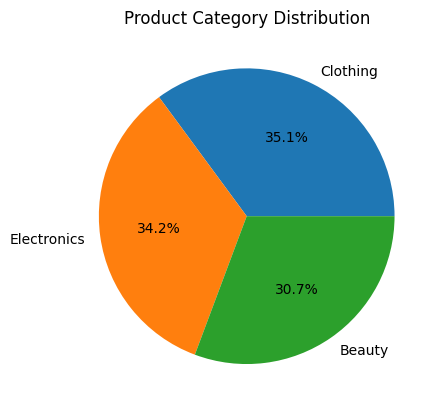

In [ ]:
category_counts = df['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')
plt.ylabel(None)
plt.show()

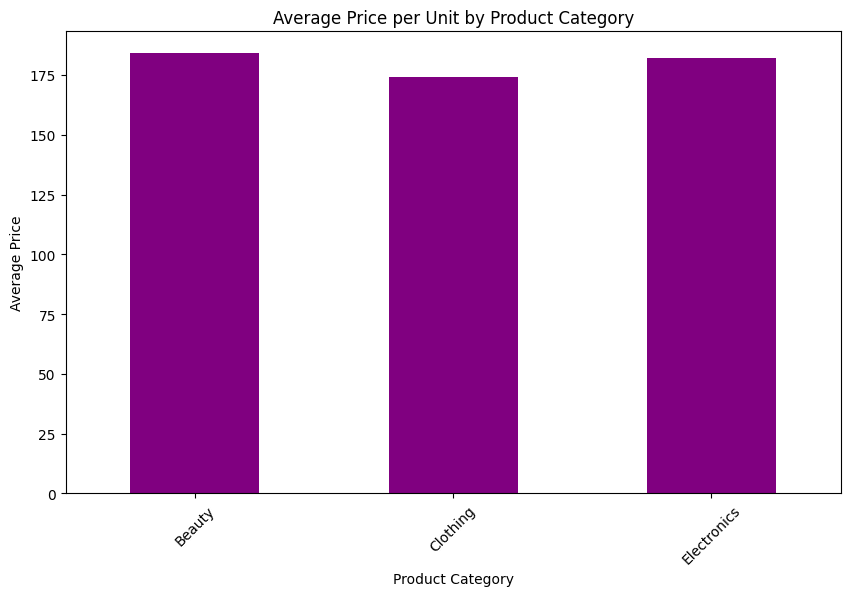

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Product_Category')['Price_per_Unit'].mean().plot(kind='bar', color='Purple')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

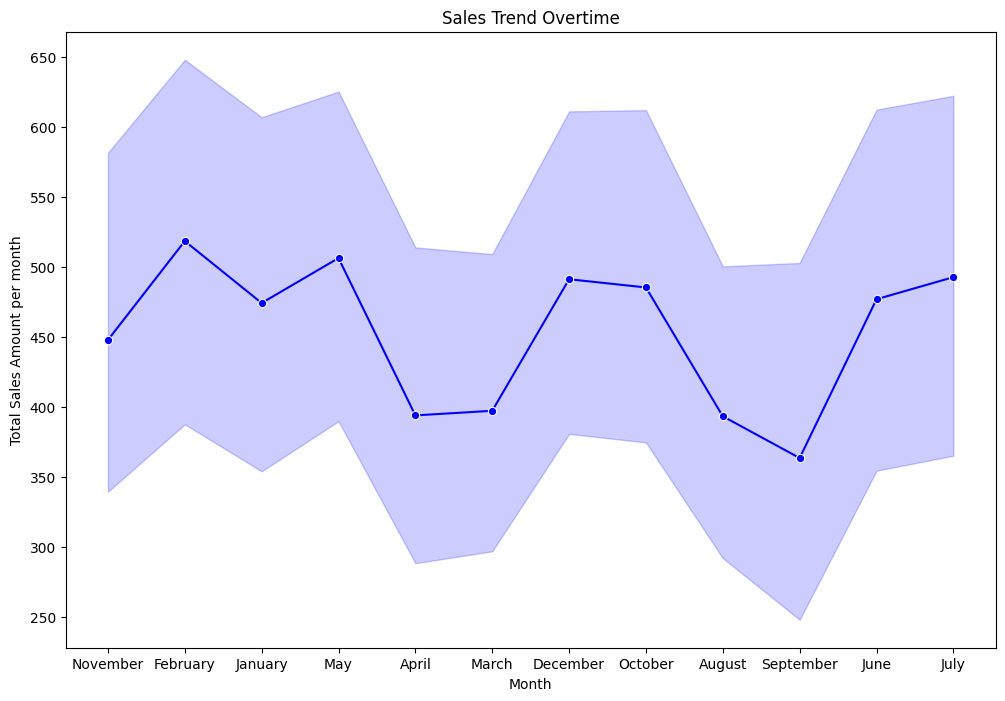

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df1.Month, y=df1['Total_Amount'],marker='o', color='b', linestyle='-')
plt.title('Sales Trend Overtime')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount per month')
plt.show()

In [ ]:
df1['Num_Month'] = df1['Date'].dt.month

In [ ]:
transaction_count = df1.groupby('Num_Month')['Transaction_ID'].count()
transaction_count

,Transaction_ID
Num_Month,
1,78
2,85
3,73
4,86
5,105
6,77
7,72
8,94
9,65


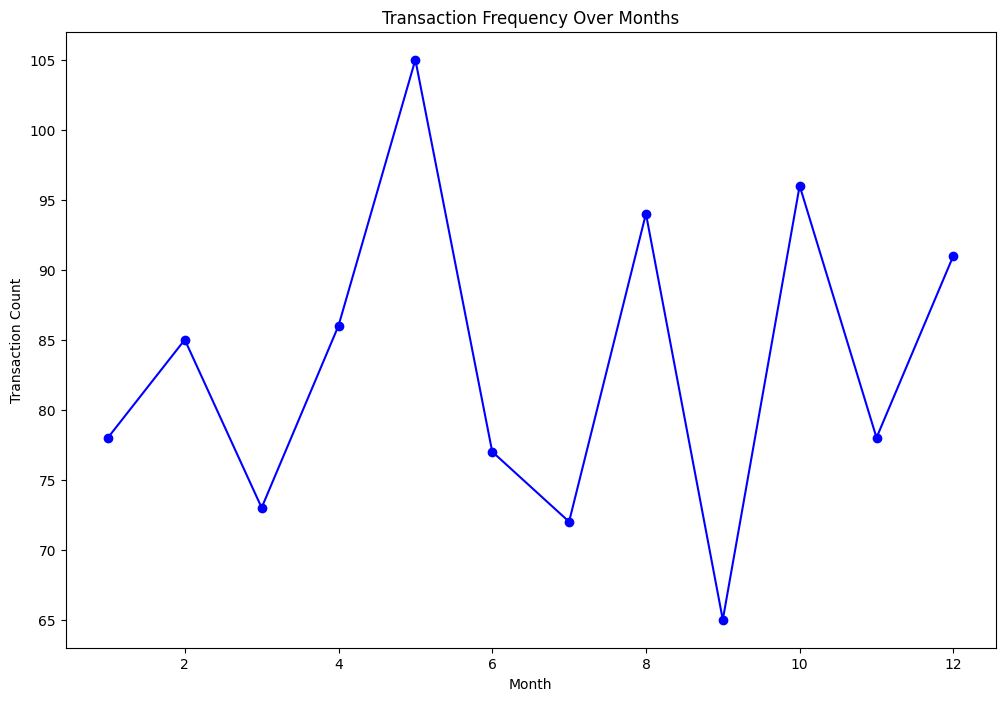

In [ ]:
plt.figure(figsize=(12,8))
df1.groupby('Num_Month')['Transaction_ID'].count().plot(kind='line',marker='o', color='b', linestyle='-')
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

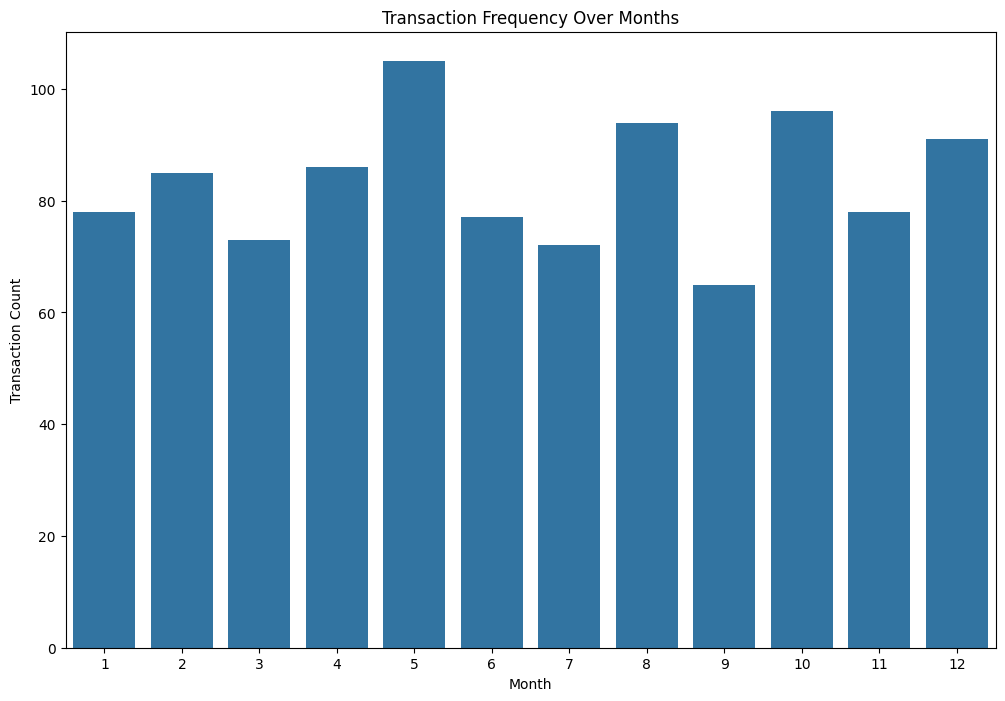

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

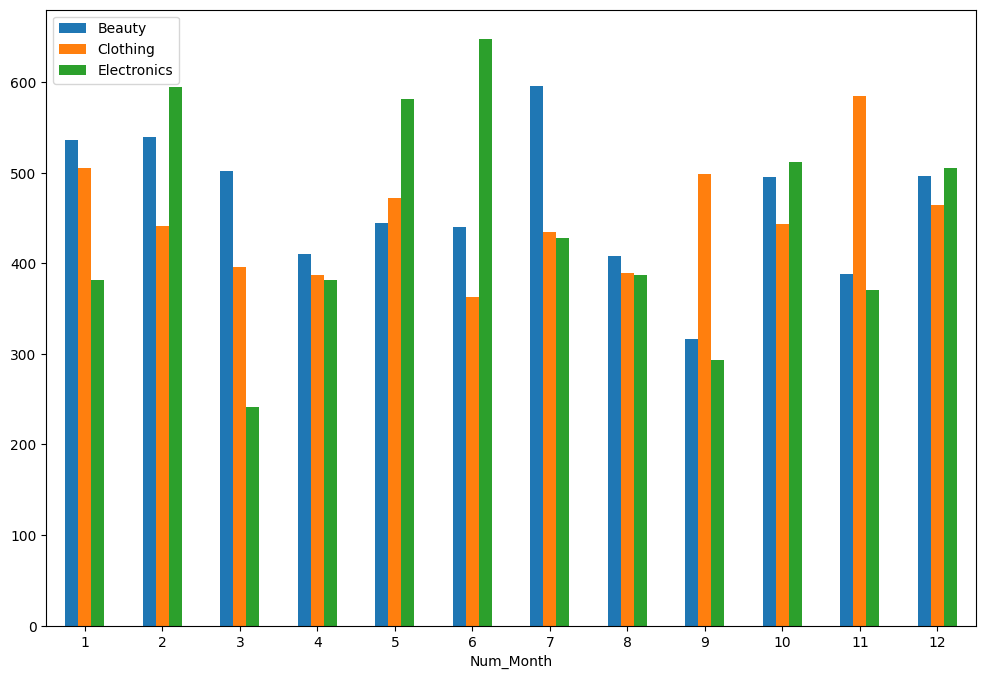

In [ ]:
sales_per_cat = df1.pivot_table(index='Num_Month', columns='Product_Category', values='Total_Amount')
sales_per_cat.plot(kind='bar',figsize=(12,8));
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [ ]:
age_bins = [0,18,25,35,50,100]
age_group = ['0-18','19-25','26-35','36-50','50+']
df1['Age_Group'] = pd.cut(df1['Age'], bins = age_bins, labels = age_group)
df1.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month,Num_Month,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,2023,November,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2023,February,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,2023,January,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,2023,May,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,06,2023,May,5,26-35


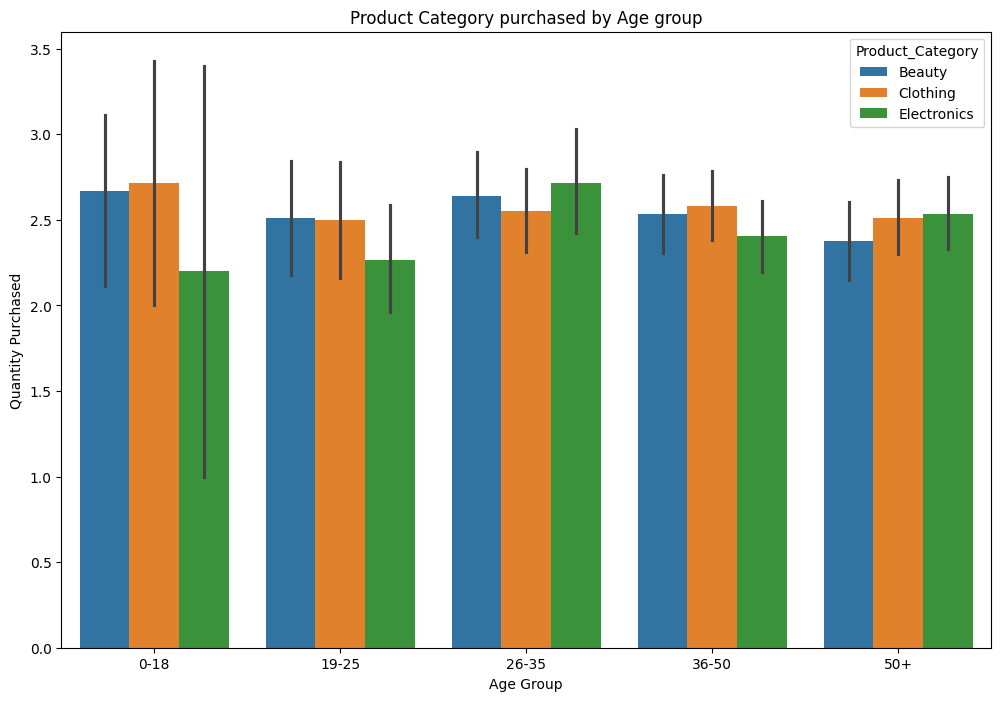

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age_Group', y='Quantity', hue='Product_Category', data= df1)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

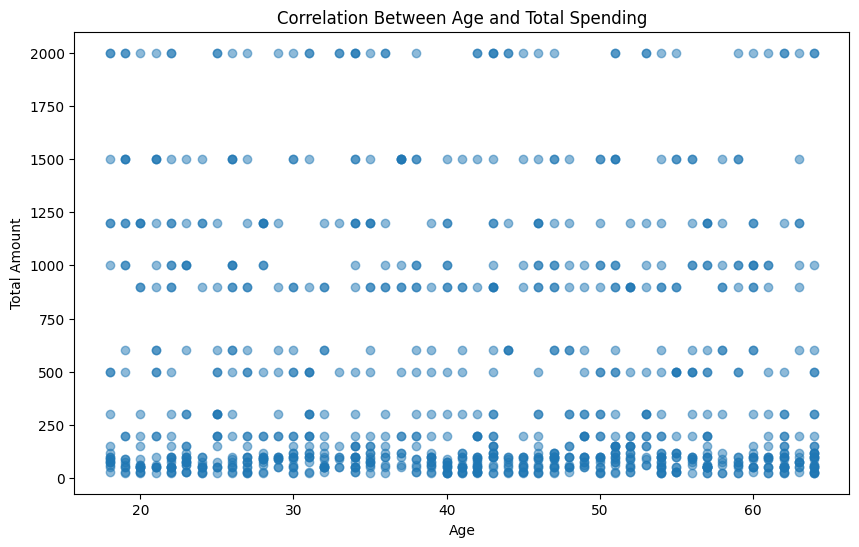

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Total_Amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Correlation Between Age and Total Spending')
plt.show()

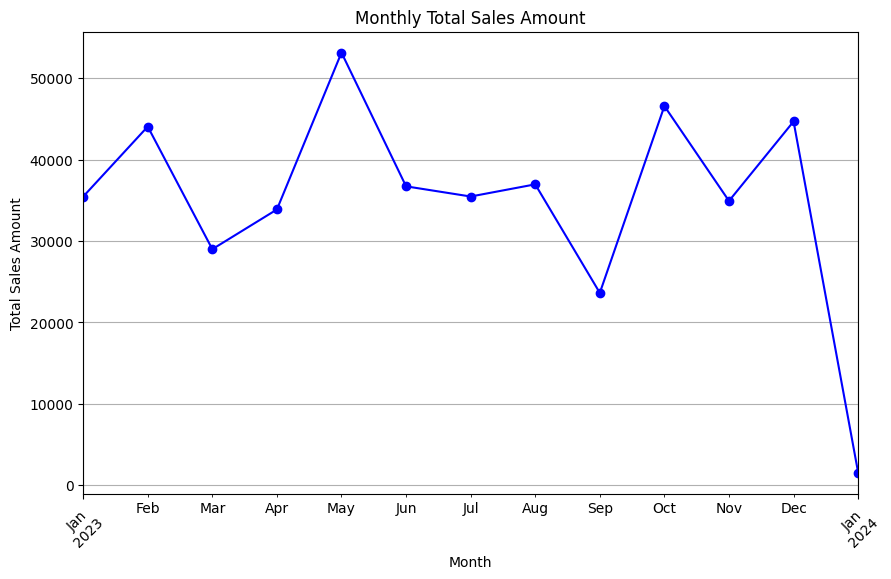

In [ ]:
monthly_sales = df1.groupby(df1['Date'].dt.to_period('M'))['Total_Amount'].sum()

# Plot the time series data
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Total Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df1['DayName'] = df1['Date'].dt.day_name()

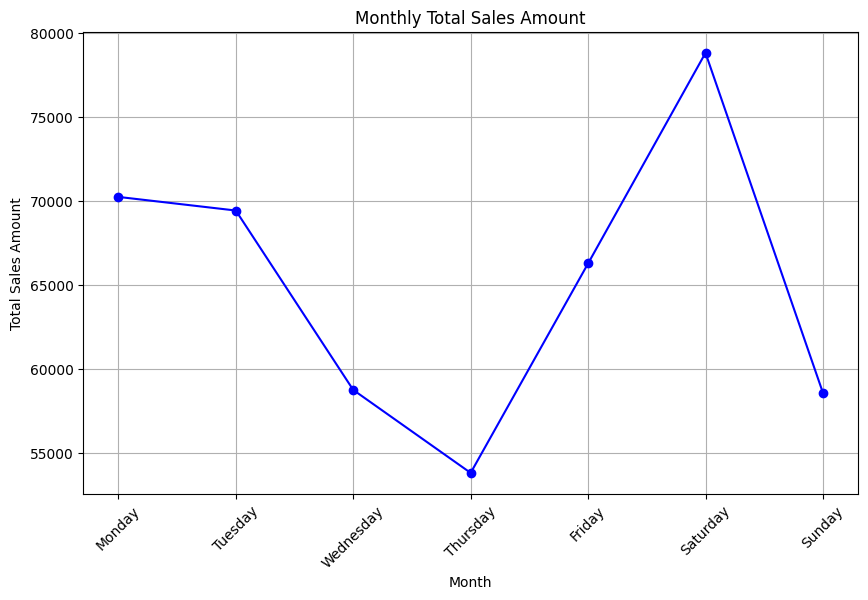

In [ ]:
daily_sales = df1.groupby(df1['DayName'])['Total_Amount'].sum()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_of_week)
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Total Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df2 = df1.copy()

In [ ]:
df2.set_index('Date',inplace=True)

In [ ]:
df2.head(2)

,Transaction_ID,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day,Year,Month,Num_Month,Age_Group,DayName
Date,,,,,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,24,2023,November,11,26-35,Friday
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,27,2023,February,2,26-35,Monday


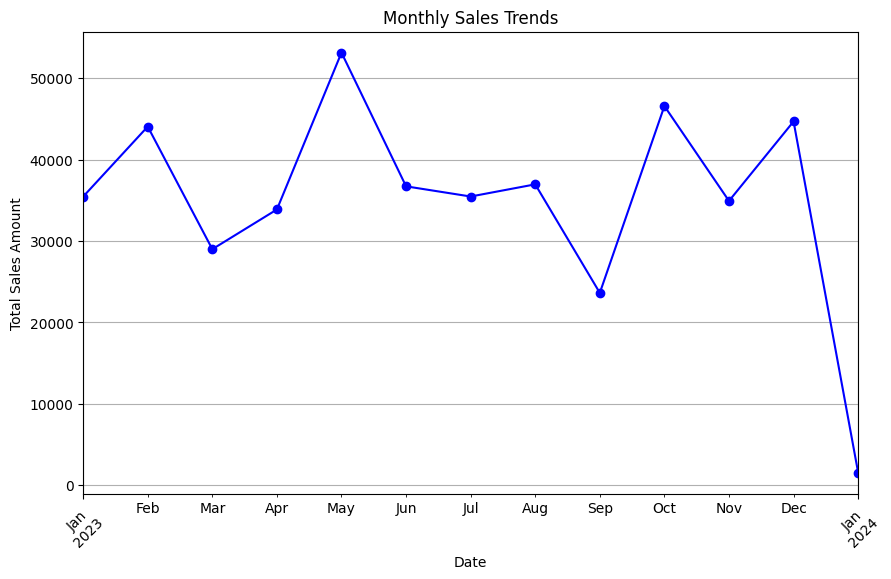

In [ ]:
monthly_sales = df2['Total_Amount'].resample('M').sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.to_csv('Cleaned Retail sales dataset.csv')